### Basic Imports and System Settings

In [1]:
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize 
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation
import statistics as st                         # for mathematical calculations
from scipy import stats                         # for hypothesis testing and numerical analysis
from statsmodels.stats.weightstats import ztest # for ztest to test the hypothesis
import math                                     # to conduct basic mathematical functions

In [2]:
import warnings                                         # to filter necessary warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 500)                  # to display maximum 500 rows
pd.set_option("display.max_columns", 500)               # to display maximum 500 columns

In [3]:
# Check for the version of the libraries 
print("Pandas version: ",pd.__version__)
print("Seaborn version: ",sns.__version__)
print("Matplotlib version: ",mat.__version__)

Pandas version:  1.3.5
Seaborn version:  0.12.2
Matplotlib version:  3.5.3


In [4]:
df = pd.read_csv("DS1_C6_S4_Credit_Data_Hackathon.csv") 

In [5]:
df.head() # head prints the top 5 rows 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,Family,State servant,Higher education,Married,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [6]:
df.tail() # tail returns the bottom 5 rows

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,Unaccompanied,Commercial associate,Higher education,Married,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,Family,Commercial associate,Secondary / secondary special,Married,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [7]:
print(df.shape) #returns a tuple of number of rows and columns 

(100000, 24)


In [8]:
print(df.columns) # returns array of columns in dataset 


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')


In [9]:
df.info()       # returns the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

To check the number of null values

In [10]:
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

## Hypothesis

* An individual count of family members increase the Amount Income Total
* Male earns more than Females
* Females are more sincere in term of Loan repayment than males
* Those who holds Academic Degree earn more
* Contract Type Cash Loan are more prone to default as compare to Revolving Loan
* Labourers are more in terms of availing loan and also they are more defaulter in repayment
* Married people have more chances to default on loan repayment
* State Servant default the least

#### Functions in Use

##### Function to seperate columns into categorical and numerical

In [11]:
def sep(df):
    categorical = []
    continuous = []
    
    for column in df.columns:
        if df[column].nunique() < 15:
            categorical.append(column)
            
        else:
            continuous.append(column)
                
    return categorical, continuous

categorical, continuous = sep(df)

table ={"Categorical":categorical, "Continuous":continuous}
print(tabulate(table, headers=["Categorical","continuous"]))


Categorical          continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN         OCCUPATION_TYPE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


##### Function to plot different kinds of graph

In [12]:
def plot_graph(type = None, col = None, length = 15, width = 7, title = None, orient = 'h',col2=None,xlabel=None,ylabel=None):    
    if type == "pie": 
        x1 = df[col].value_counts()
        y1 = df[col].value_counts().index
        plt.pie(x1, labels = y1, autopct = "%.2f%%")
        plt.title(title)
        plt.show()
    elif type == "countplot":
        fig, ax = plt.subplots(figsize = (length,width)) 
        xx = sns.countplot(x = df[col], orient = "h", hue = col2)
        for p in xx.patches:
            xx.annotate("{:.1f}".format((p.get_height())), (p.get_x(), p.get_height()+0.01))
        plt.show()
    elif type == "histplot": 
        sns.histplot(x = df[col], color = "m")
        plt.show()
    elif type == "boxplot": 
        sns.boxplot(x = df[col], color = "g")
        plt.show()
    elif type == "barh" : 
        #plt.subplots(figsize = (length,width))
        xdf=df.pivot_table(index=col,values=col2,aggfunc="count")
        xdf=xdf.reset_index()
        xdf.plot.barh(x=col,y=col2,color='green')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()
    

### Categorical Data Analysis

##### Function returns all the information required for the level 1 analysis

In [13]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [14]:
categorical

['TARGET',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'Car',
 'House',
 'CNT_CHILDREN',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'MOBILE',
 'WORK_PHONE',
 'HOME_PHONE',
 'MOBILE_REACHABLE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'APPLICATION_DAY',
 'TOTAL_DOC_SUBMITTED']

In [15]:
without_id=[column for column in df.columns if column!='SK_ID_CURR'] 

#check for duplicate values
na=df[df.duplicated(subset=without_id,keep=False)] 
print("Duplicates are: ",na.shape[0])

Duplicates are:  616


Shift of Occupation Type from the list of continuous data to categorical data

In [16]:
continuous.remove("OCCUPATION_TYPE")
categorical.append("OCCUPATION_TYPE")

Categorical Data Analysis

Unique values in TARGET are: [1 0]
Mode of TARGET is 0
Number of missing values in TARGET is 0


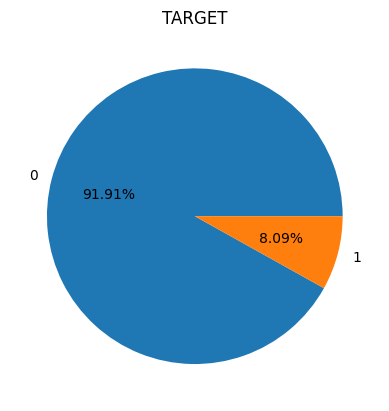

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans
Number of missing values in NAME_CONTRACT_TYPE is 0


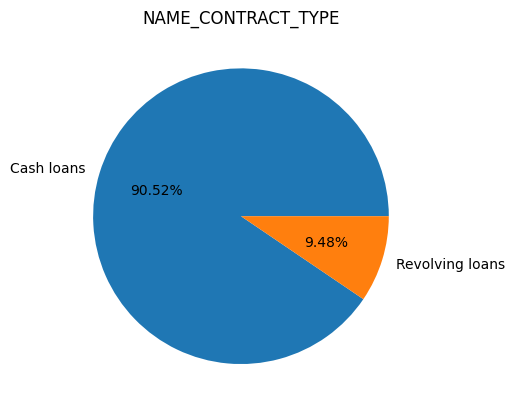

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is F
Number of missing values in GENDER is 0


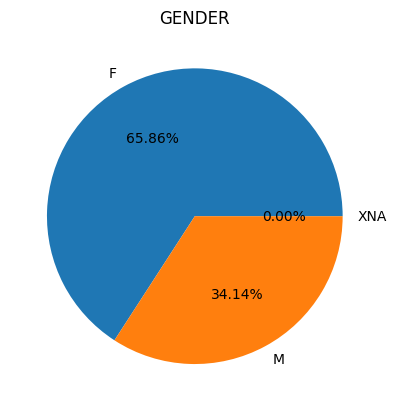

Unique values in Car are: ['N' 'Y']
Mode of Car is N
Number of missing values in Car is 0


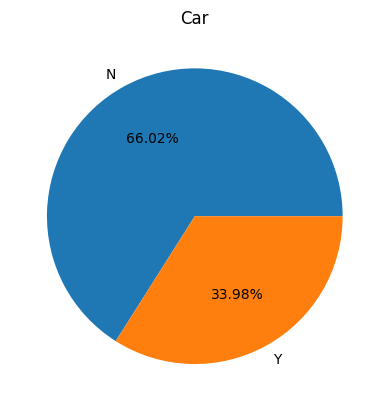

Unique values in House are: ['Y' 'N']
Mode of House is Y
Number of missing values in House is 0


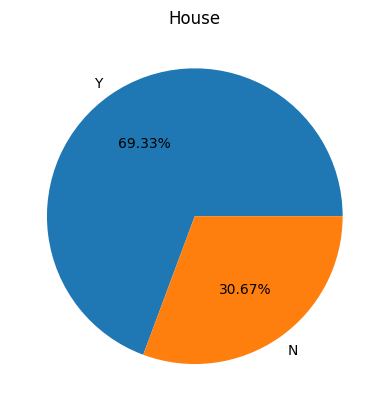

Unique values in CNT_CHILDREN are: [ 0  1  2  3  4  7  5  6  8  9 11 12]
Mode of CNT_CHILDREN is 0
Number of missing values in CNT_CHILDREN is 0


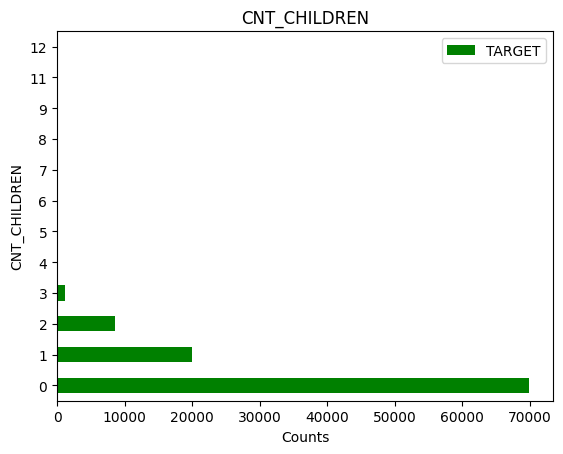

Unique values in NAME_TYPE_SUITE are: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
Mode of NAME_TYPE_SUITE is Unaccompanied
Number of missing values in NAME_TYPE_SUITE is 405

There are null values in the NAME_TYPE_SUITE column


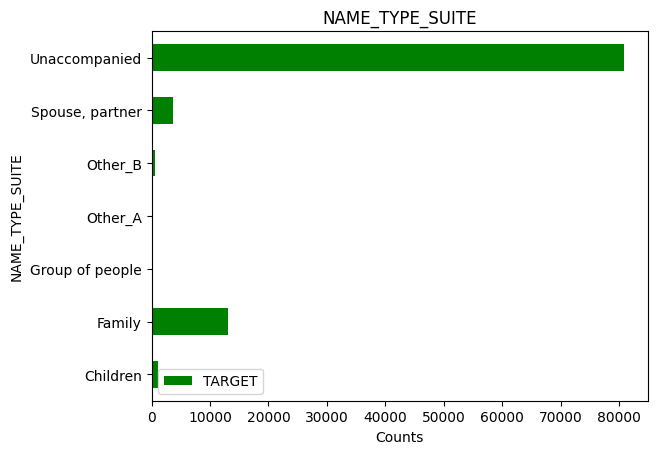

Unique values in NAME_INCOME_TYPE are: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Mode of NAME_INCOME_TYPE is Working
Number of missing values in NAME_INCOME_TYPE is 0


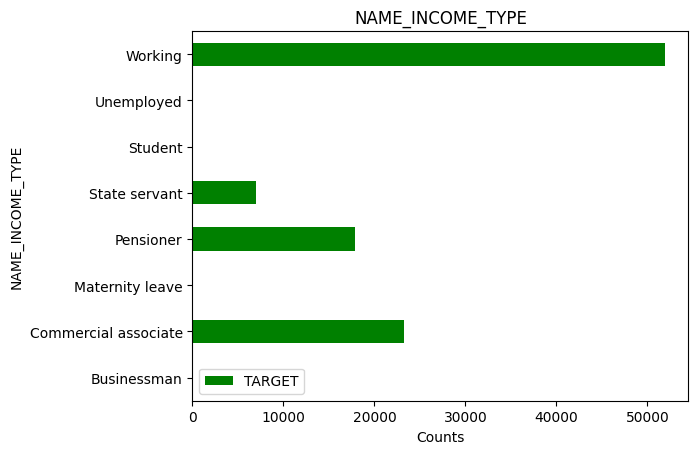

Unique values in NAME_EDUCATION_TYPE are: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Mode of NAME_EDUCATION_TYPE is Secondary / secondary special
Number of missing values in NAME_EDUCATION_TYPE is 0


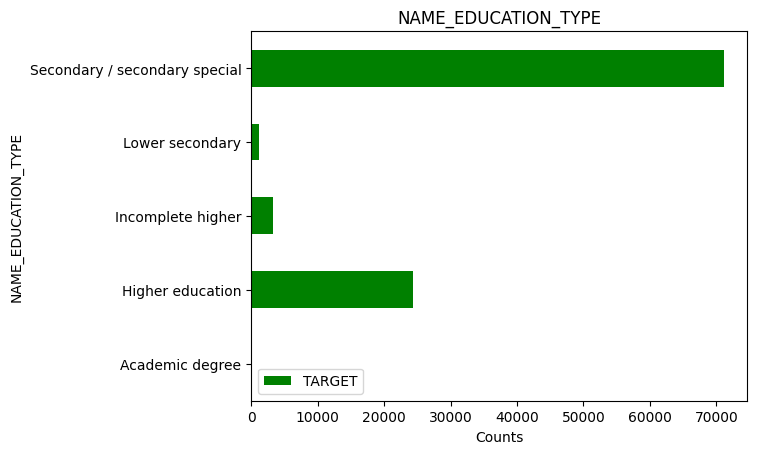

Unique values in NAME_FAMILY_STATUS are: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Mode of NAME_FAMILY_STATUS is Married
Number of missing values in NAME_FAMILY_STATUS is 0


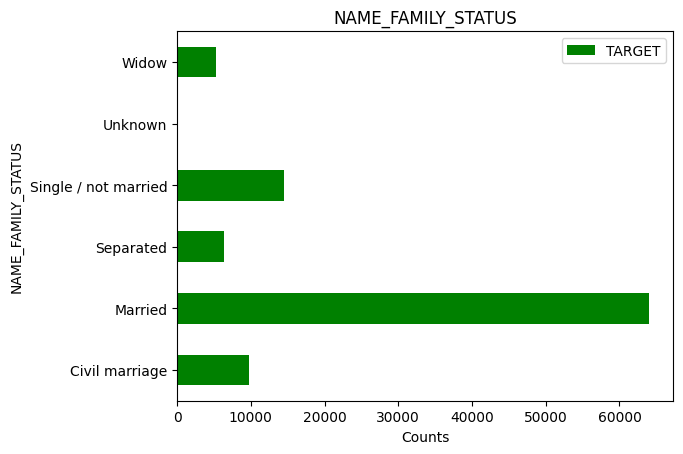

Unique values in MOBILE are: [1 0]
Mode of MOBILE is 1
Number of missing values in MOBILE is 0


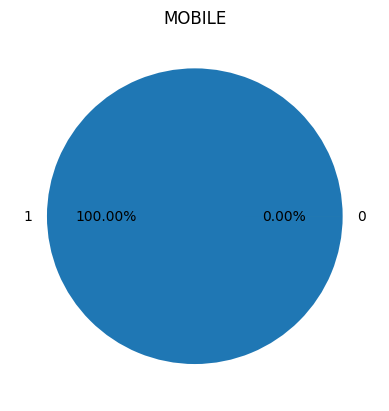

Unique values in WORK_PHONE are: [1 0]
Mode of WORK_PHONE is 1
Number of missing values in WORK_PHONE is 0


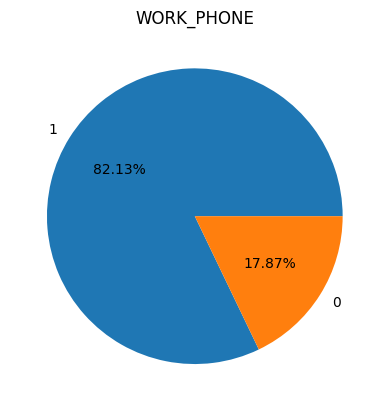

Unique values in HOME_PHONE are: [0 1]
Mode of HOME_PHONE is 0
Number of missing values in HOME_PHONE is 0


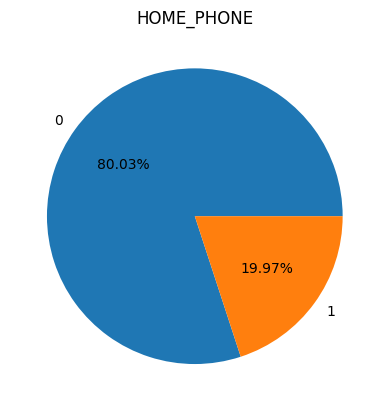

Unique values in MOBILE_REACHABLE are: [1 0]
Mode of MOBILE_REACHABLE is 1
Number of missing values in MOBILE_REACHABLE is 0


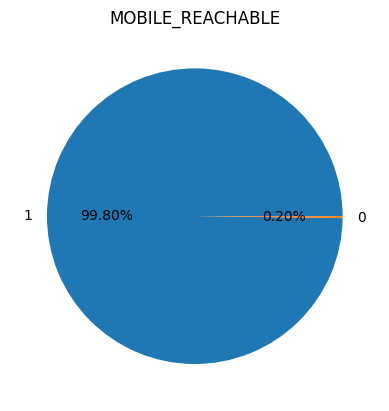

Unique values in FLAG_EMAIL are: [0 1]
Mode of FLAG_EMAIL is 0
Number of missing values in FLAG_EMAIL is 0


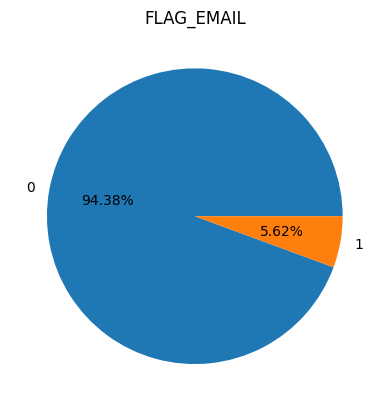

Unique values in CNT_FAM_MEMBERS are: [ 1.  2.  3.  4.  5.  6.  9.  7.  8. 10. 13. nan 14.]
Mode of CNT_FAM_MEMBERS is 2.0
Number of missing values in CNT_FAM_MEMBERS is 1

There are null values in the CNT_FAM_MEMBERS column


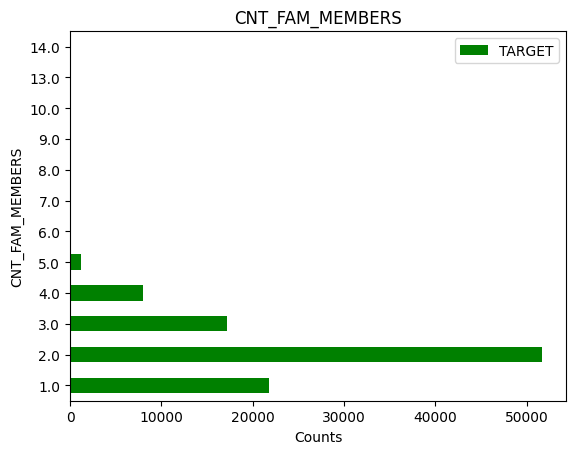

Unique values in APPLICATION_DAY are: ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']
Mode of APPLICATION_DAY is TUESDAY
Number of missing values in APPLICATION_DAY is 0


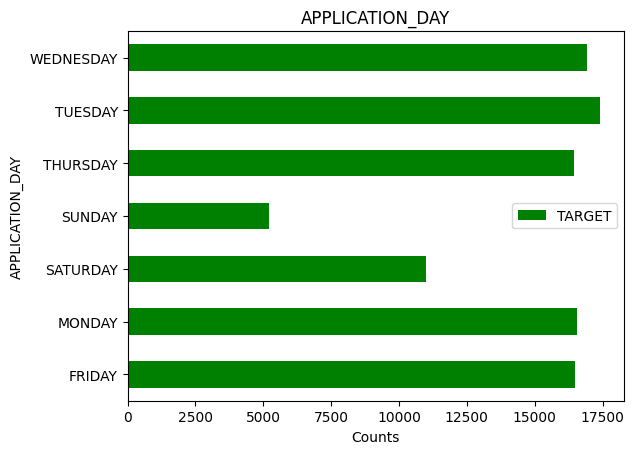

Unique values in TOTAL_DOC_SUBMITTED are: [1 0 2 3 4]
Mode of TOTAL_DOC_SUBMITTED is 1
Number of missing values in TOTAL_DOC_SUBMITTED is 0


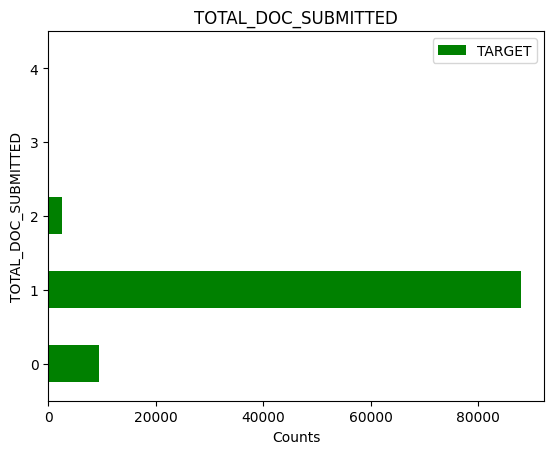

Unique values in OCCUPATION_TYPE are: ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
Mode of OCCUPATION_TYPE is Laborers
Number of missing values in OCCUPATION_TYPE is 31224

There are null values in the OCCUPATION_TYPE column


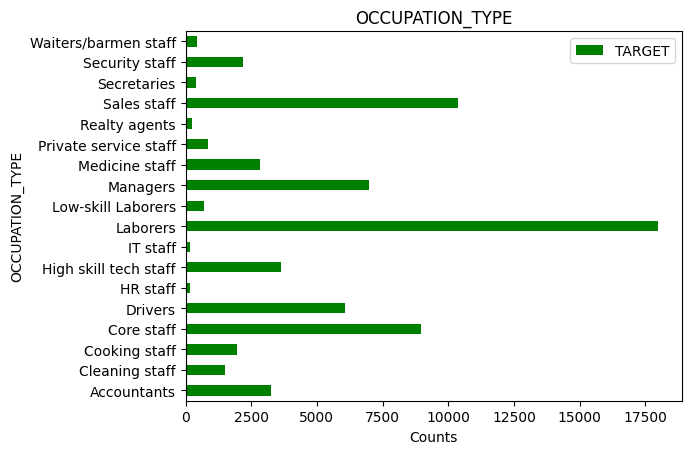

In [17]:
for i in categorical:
    info_of_cat(i)
    if df[i].nunique() > 4: 
        plot_graph(type = "barh", col = i, length = 5, width = 5, title = i,col2="TARGET",xlabel="Counts",ylabel=i)
    else: 
        plot_graph(type = "pie", col = i, length = 5, width = 5, title = i)

### Conclusion
* Target:-
The data shows that 8.09% of people have not paid their loan installments properly 

* Contract type:-
It can be assessed that around 90.52% have had cash loans while only 9.48% had revolving loans

* Gender :- 
A major percentage of customers are female amounting to nearly 65.86% while there are around 34.14% males

* Car :-
A majority proportion of customers do not have a car amounting to around 66.02%

* House:-
A majority customers amounting to 69.33% own houses while around 30.67% reside in flats

* Count of Children :-
Maximum clients have 0 children as registered while only a few clients have around 3 or more children.

* Name type suite :-
Maximum clients have been unaccompanied while a minority of them were accompanied by group of people

* Income type :-
A majority of them were working class citizens
A minority of clients belonged to the section of - unemployed, student, maternity leave, businerssmen
It can be inferred that state servants were lesser in proportion to peensioners
and working class were more than busniessmen

* Education type :-
Maxmimum clients were with a secondary/secondary special education while minimum clients were academic degree

* Family Status :-
Maximum clients were married wheras minimum were widow and seperated while there's a very less availability of data of those unknown

* Work phone :- 
Aroun 17.87% of clients did not provide with their work phones

* Home phone :-
Major thing to be known is that around 80.03% people did not provide their home phone numbers

* Reachable :- 
The mobile of around 0.20% were not reachable

* Flag email :- 
Only 5.62% clients provided their emails

* Count of family members :- 
Most of the clients have 2 members in their family while a minority of members have family members more than 5.

* Application day :- 
Maximum clients have applied on Tueday while a minority applied on Sunday

* Total documents submitted :- 
It can be inferred that maximum candidates have submitted atleast 1 document while it is astonishing to note that there is a group of clients who've not submitted any document.

* Occupation type :- 
Maximum labourers have enrolled for loans to the banks while the IT staff people have enrolled the least.

In [18]:
#for i in categorical:
    #info_of_cat(i)
    #if df[i].nunique() > 4: plot_graph(type = "countplot", col = i, length = 5, width = 5, title = i)
    #else: plot_graph(type = "pie", col = i, length = 5, width = 5, title = i)

#### Numerical Data Analysis

Since the id column will not be assesed, therefore, removing it from the list

In [19]:
continuous.remove("SK_ID_CURR")

Getting the numerical data analysed

In [20]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

Removing necessary outliers

In [21]:
def rem_oulier(colname):
    lst=[]
    t2=df[colname].describe()
    valq1 = t2.loc["25%"]
    valq3 = t2.loc["75%"]
    iqr = valq3 - valq1
    #print(iqr)
    upper = valq3 + iqr*1.5
    lower = valq1 - iqr*1.5
    print(f"{upper} is the upper fence value of {colname}")
    print(f"{lower} is the lower fence value of {colname}")
    a1 = df[df[colname] > upper][colname]
    a1=a1.sort_values()
    print(f"Upper Fence: {a1.tail()}")
    b1 = df[df[colname] < lower][colname].sort_values()
    b1=b1.sort_values()
    print(f"Lower Fence: {b1.tail(10)}")
 #   lst.append(a1.head())
#    lst.append(b1.head())
    return lst

    #return upper,lower


In [22]:
#['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']
lst_new=rem_oulier("AMT_INCOME_TOTAL")
print(lst_new)

2250000.0,3375000.0,3825000.0,3600000.0


337500.0 is the upper fence value of AMT_INCOME_TOTAL
-22500.0 is the lower fence value of AMT_INCOME_TOTAL
Upper Fence: 86026      3375000.0
49645      3600000.0
20216      3825000.0
77768      9000000.0
12840    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64
Lower Fence: Series([], Name: AMT_INCOME_TOTAL, dtype: float64)
[]


(2250000.0, 3375000.0, 3825000.0, 3600000.0)

In [23]:
print(continuous)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']


The mean of the AMT_INCOME_TOTAL is 169426.07027325002
The median of the AMT_INCOME_TOTAL is 144000.0
The mode of the AMT_INCOME_TOTAL is 135000.0
The standard deviation of the AMT_INCOME_TOTAL is 383500.74427719973
Number of missing values in the AMT_INCOME_TOTAL is 0


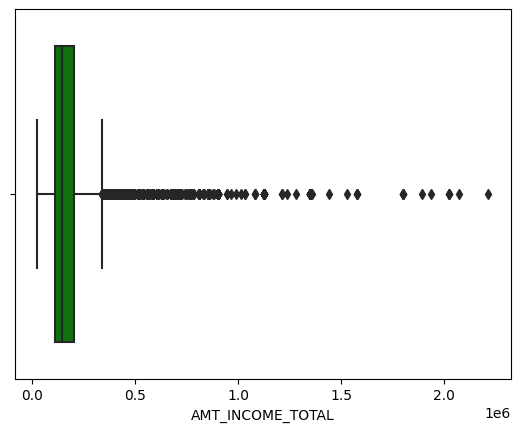

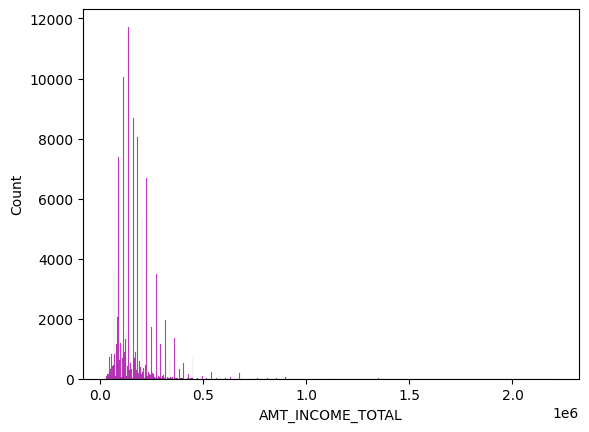

The mean of the AMT_CREDIT is 598929.9330369644
The median of the AMT_CREDIT is 513040.5
The mode of the AMT_CREDIT is 450000.0
The standard deviation of the AMT_CREDIT is 401995.40503592486
Number of missing values in the AMT_CREDIT is 0


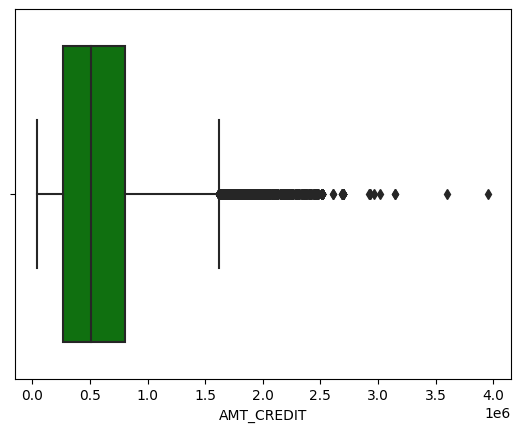

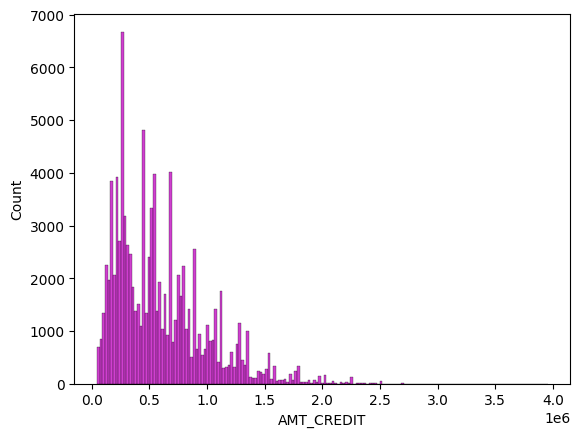

The mean of the AMT_GOODS_PRICE is 538164.7275384369
The median of the AMT_GOODS_PRICE is 450000.0
The mode of the AMT_GOODS_PRICE is 450000.0
The standard deviation of the AMT_GOODS_PRICE is 368856.2020518507
Number of missing values in the AMT_GOODS_PRICE is 81


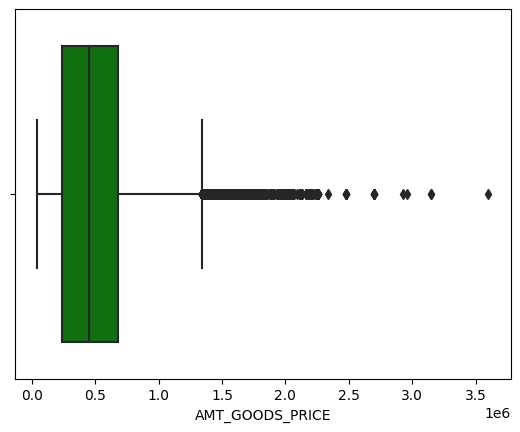

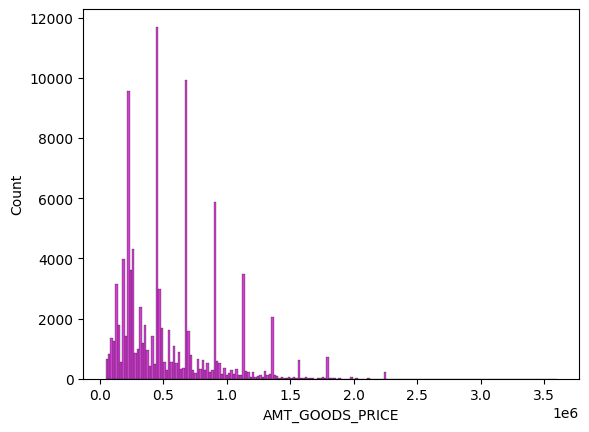

The mean of the DAYS_EMPLOYED is 63295.369799167864
The median of the DAYS_EMPLOYED is -1219.0
The mode of the DAYS_EMPLOYED is 365243
The standard deviation of the DAYS_EMPLOYED is 140842.34849377052
Number of missing values in the DAYS_EMPLOYED is 0


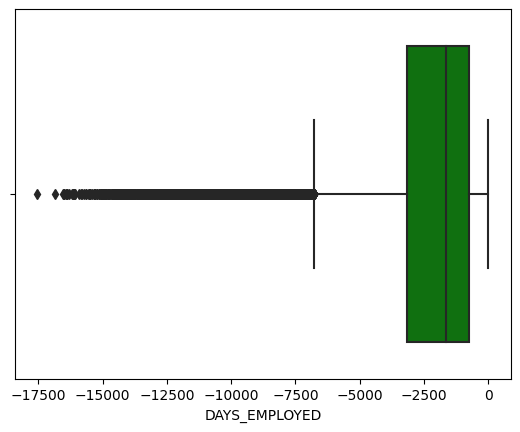

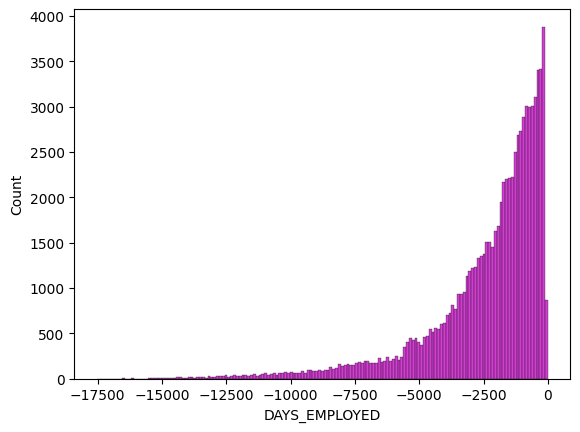

In [24]:
# Describing the data and plotting the boxplot and histogram to assess the skewness and distribution of the data
for i in continuous:
    info_of_numerical(i)
    if(i=="AMT_INCOME_TOTAL"):
        #dropping two values 9000000.0,117000000.0
        df=df[df.AMT_INCOME_TOTAL.isin([2250000.0,3375000.0,3825000.0,3600000.0,9000000.0,117000000.0])==False]
    elif(i=="AMT_CREDIT"):
        #dropping two values 4031032.5,4050000.0
        df=df[df.AMT_CREDIT.isin([4031032.5,4050000.0])==False]
    elif(i=="AMT_GOODS_PRICE"):
        #dropping two values 4031032.5,4050000.0
        df=df[df.AMT_GOODS_PRICE.isin([3825000.0,4050000.0])==False]
    elif(i=="DAYS_EMPLOYED"):
        #dropping two values 4031032.5,4050000.0
        df=df[df.DAYS_EMPLOYED.isin([365243,-6459,-6460,-6462,-6463])==False]
    plot_graph(type = "boxplot", col = i, length = 7, width = 3, title = f"{i} Dsitribution")
    plot_graph(type = "histplot", col = i, length = 7, width = 3, title = f"{i} Dsitribution")
        

### Numerical Data Analysis 
* AMT_INCOME_TOTAL - The data is right skewed and almost 50 percentile of the data lies before or till 144000
* AMT_CREDIT - The data is right skewed and almost 50 percentile of the data lies before or till 513040.5
* AMT_GOODS_PRICE - The data is right skewed and almost 50 percentile of the data lies before or till 450000
* DAYS_EMPLOYED - The data is left skewed and almost 50 percentile of the data lies before or till -1219

## TESING THE HYPOTHESIS

Amount income total - Count of Family

                          mean    median
CNT_FAM_MEMBERS                         
1.0              172636.506568  157500.0
2.0              176448.721172  157500.0
3.0              174241.258340  157500.0
4.0              171959.456350  153000.0
5.0              175931.821586  157500.0
6.0              168326.865672  144000.0
7.0              224385.000000  171000.0
8.0              160312.500000  146250.0
9.0              132750.000000  132750.0
10.0             146250.000000  146250.0
13.0             315000.000000  315000.0
14.0             337500.000000  337500.0


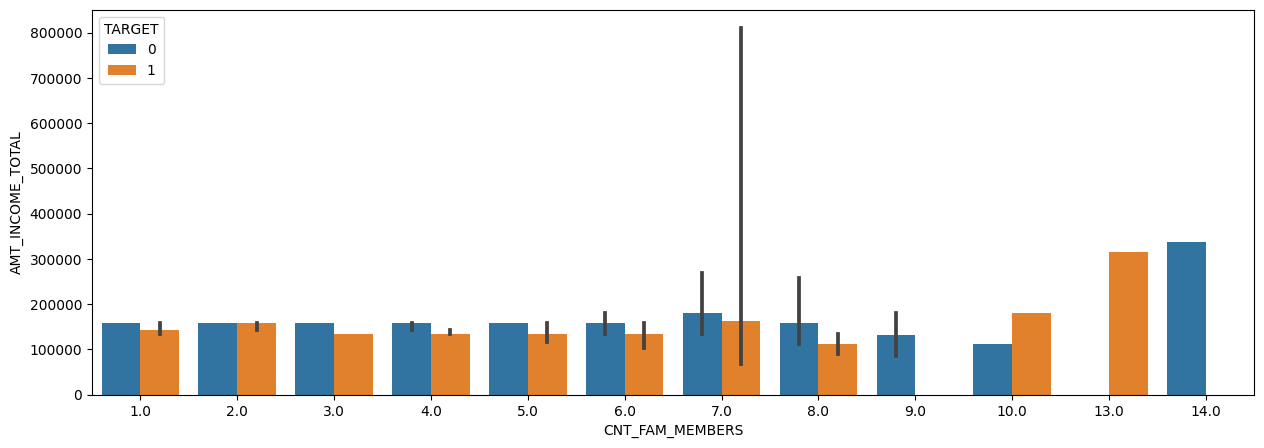

In [25]:
credit = df.groupby('CNT_FAM_MEMBERS')['AMT_INCOME_TOTAL'].agg(["mean", "median"])
print(credit)
plt.figure(figsize= (15,5))
sns.barplot(x= df['CNT_FAM_MEMBERS'], y= df['AMT_INCOME_TOTAL'],hue=df['TARGET'],estimator= np.median)
plt.show()

* Count of Family members and Amount Total Income :- There  is no pattern that can be observed from above graphs that shows that the Amount of Total income Increases with respect to Count of Family members hence Hypothesis stands incorrect.

Amount - Education Type

                                        mean    median
NAME_EDUCATION_TYPE                                   
Academic degree                227362.500000  225000.0
Higher education               211967.456834  180000.0
Incomplete higher              182683.149614  157500.0
Lower secondary                146277.781547  135000.0
Secondary / secondary special  160487.954767  135000.0


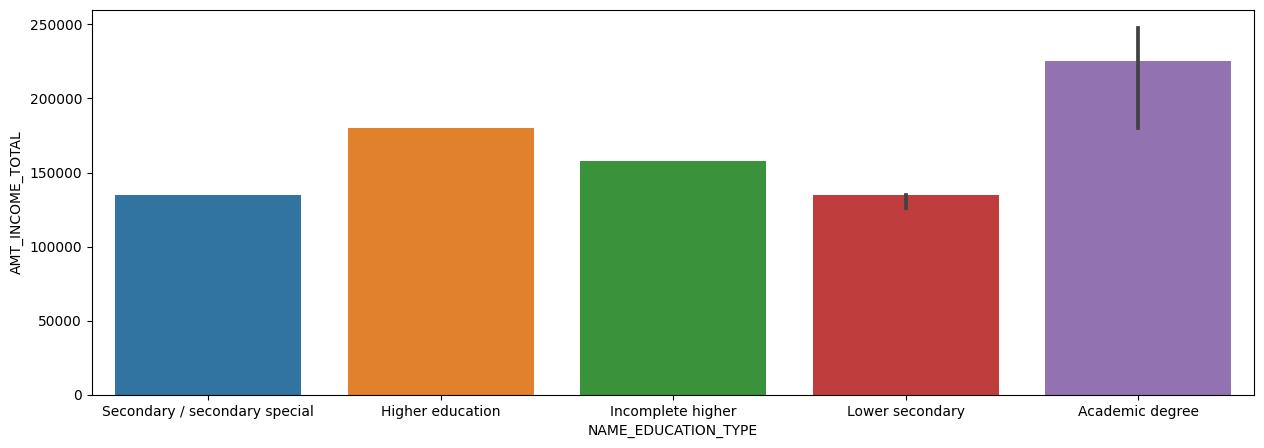

In [26]:
credit = df.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].agg(["mean", "median"])
print(credit)
plt.figure(figsize= (15,5))
sns.barplot(x= df['NAME_EDUCATION_TYPE'], y= df['AMT_INCOME_TOTAL'],estimator= np.median)
plt.show()

* Academic degree holders are earning more as compare to other degree holder

Amount type - gender

                 mean    median
GENDER                         
F       161155.729877  135000.0
M       197549.624757  180000.0
XNA     166500.000000  157500.0


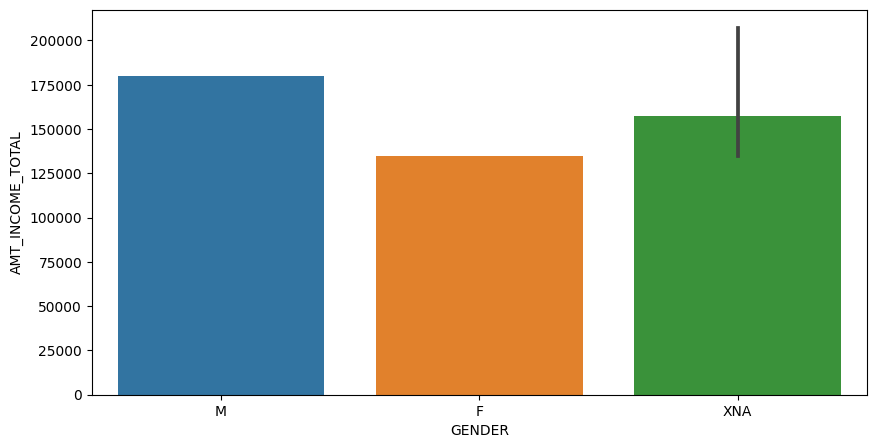

In [27]:
credit = df.groupby('GENDER')['AMT_INCOME_TOTAL'].agg(["mean", "median"])
print(credit)
plt.figure(figsize= (10,5))
sns.barplot(x= df['GENDER'], y= df['AMT_INCOME_TOTAL'],estimator= np.median)
plt.show()

* Male Earn More than Females :- As observed from above graph that maximum earning of males are 175000 while females remain at approx 130000. Hence Hypothesis 2 stands correct.


Contract type - target

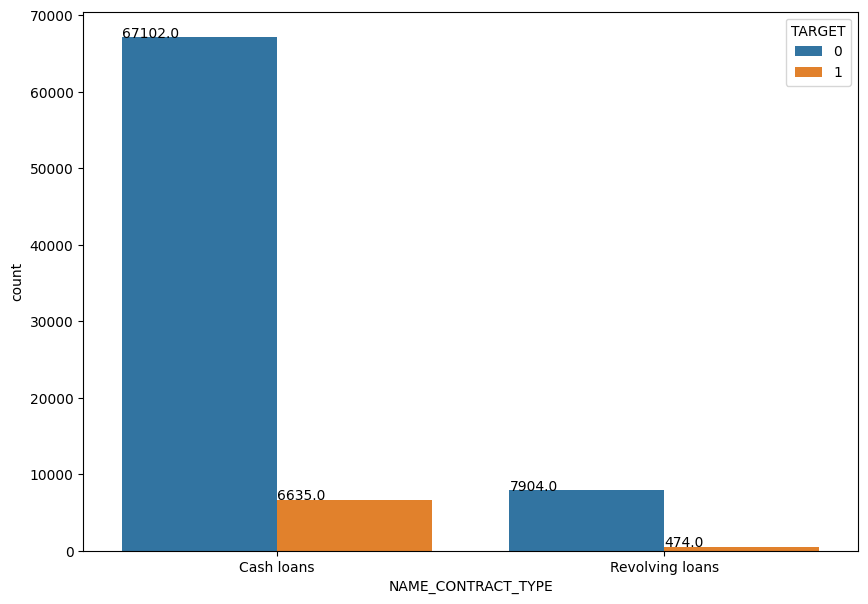

In [28]:
plot_graph(type = "countplot", col = "NAME_CONTRACT_TYPE", length = 10, width = 7, title = "Contract wise target accomplishment", col2 = df["TARGET"])

* Loan repayment basis Contract Type :- 91% cash Loan contract types are paying on time while 94.3 % Revolving Loan are paying on time. Hence, More defaulters belong to those who take CASH LOANS. 

Target - Gender

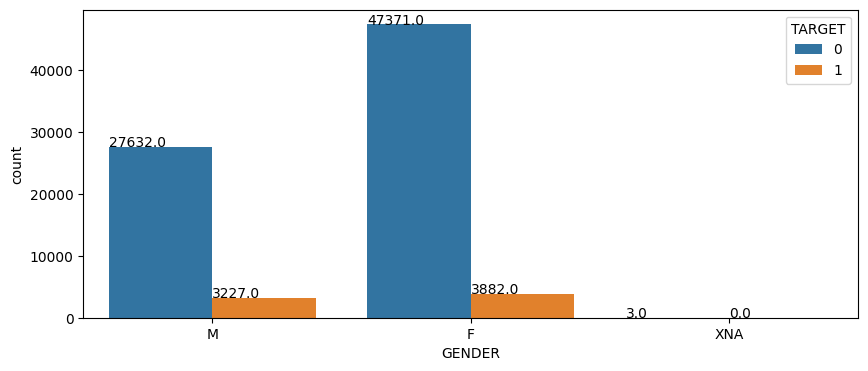

In [29]:
plot_graph(type = "countplot", col = "GENDER", length = 10, width = 4, title = "Gender wise target accomplishment", col2 = df["TARGET"])

* Females are more sincere on timely repayment as compare to male :- As shown in the above graph 92% of females are paying on time while males paying on time are 89%, hence hypothesis 3 is correct

Car - Target

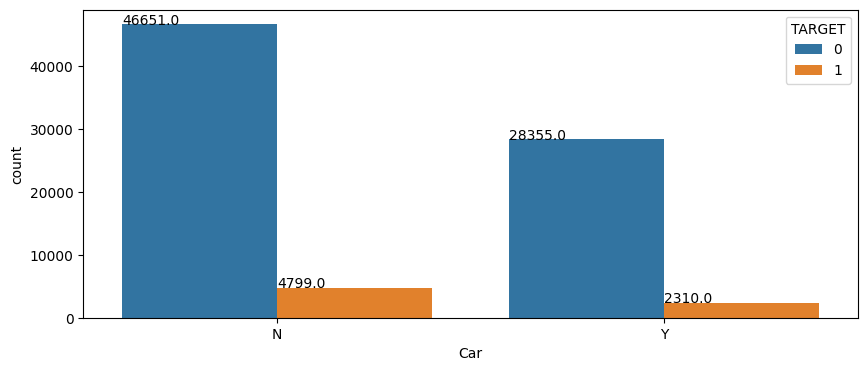

In [30]:
plot_graph(type = "countplot", col = "Car", length = 10, width = 4, title = "Effect of car presence on target accomplishment", col2 = df["TARGET"])

House - Target

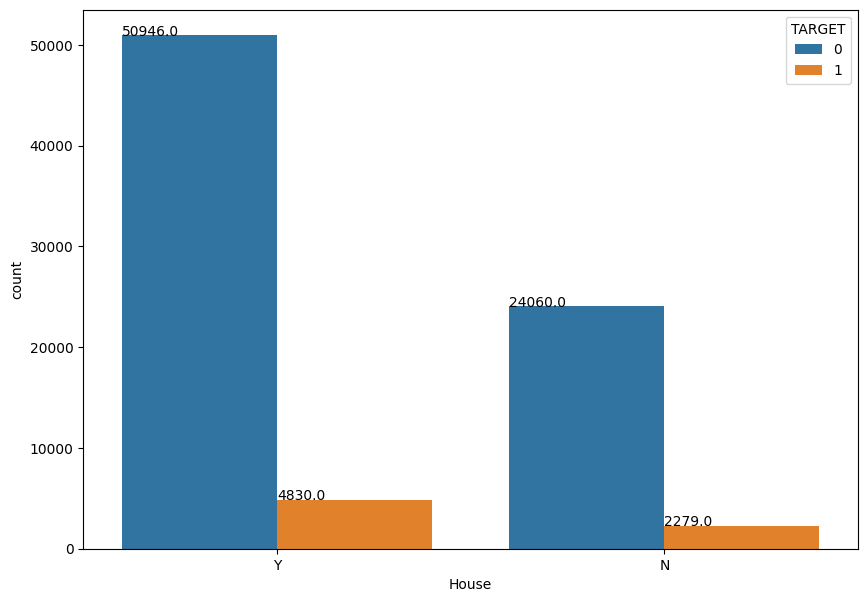

In [31]:
plot_graph(type = "countplot", col = "House", length = 10, width = 7, title = "House target accomplishment", col2 = df["TARGET"])

Total Documents Submitted - Target

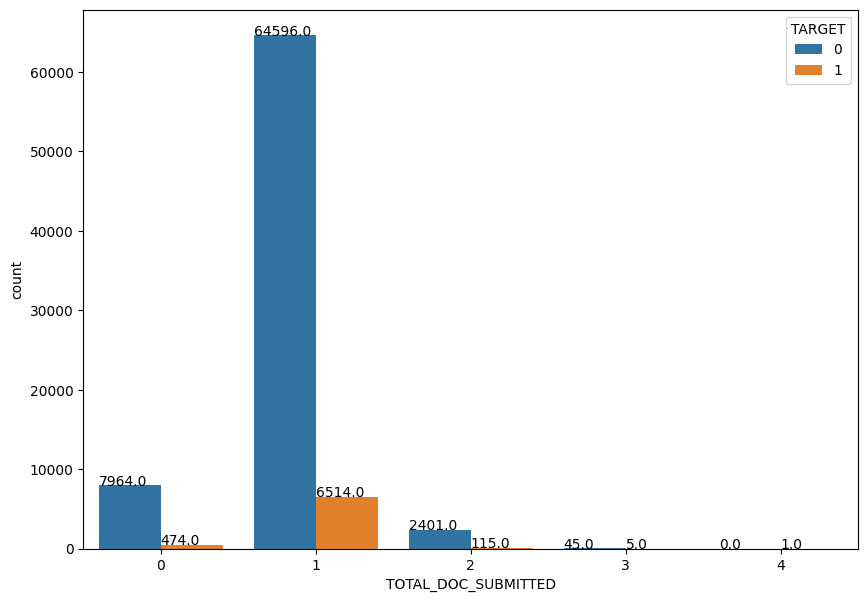

In [32]:
plot_graph(type = "countplot", col = "TOTAL_DOC_SUBMITTED", length = 10, width = 7, title = "Impact of document submission on target accomplishment", col2 = df["TARGET"])

Count of Family Members - Target

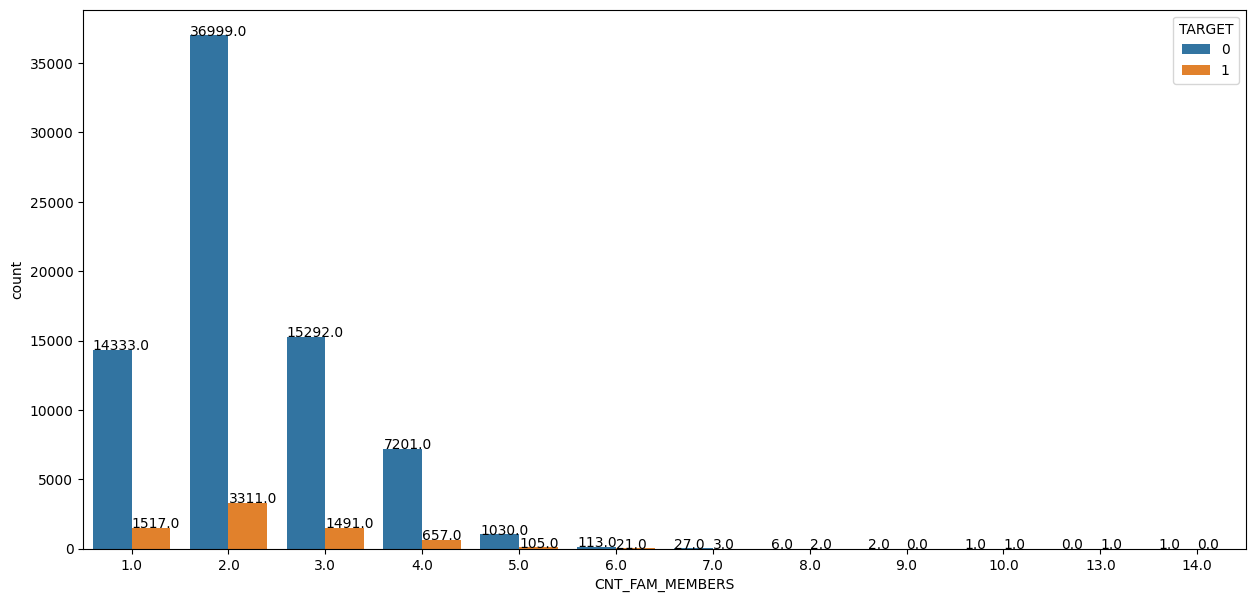

In [33]:
plot_graph(type = "countplot", col = "CNT_FAM_MEMBERS", length = 15, width = 7, title = "Impact of number of family members on target accomplishment", col2 = df["TARGET"])

Occupation Type - Target

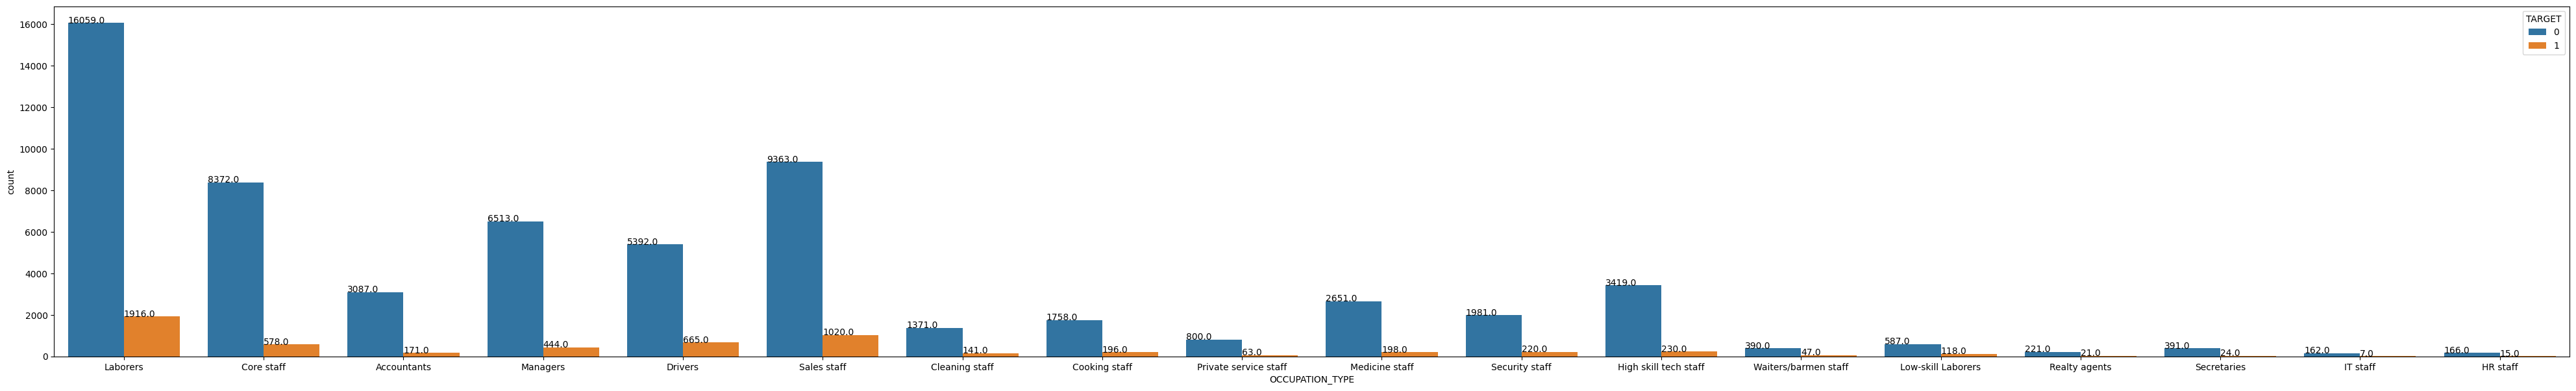

In [34]:
plot_graph(type = "countplot", col = "OCCUPATION_TYPE", length = 50, width = 7, title = "Impact of type of occupation on target accomplishment", col2 = df["TARGET"])

* Occupation Type and target :- 89.3% Labourere are paying loan on time and 10.6 % Labourers are defaulter which is highest in both case among the data given and as per above graph.

Work Phone - Target

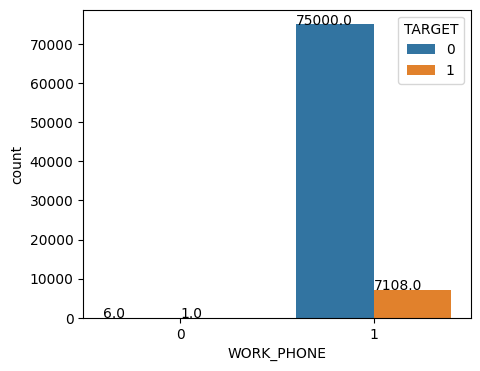

In [35]:
plot_graph(type = "countplot", col = "WORK_PHONE", length = 5, width = 4, title = "Impact of Work phone on target accomplishment", col2 = df["TARGET"])

Family Status - Target

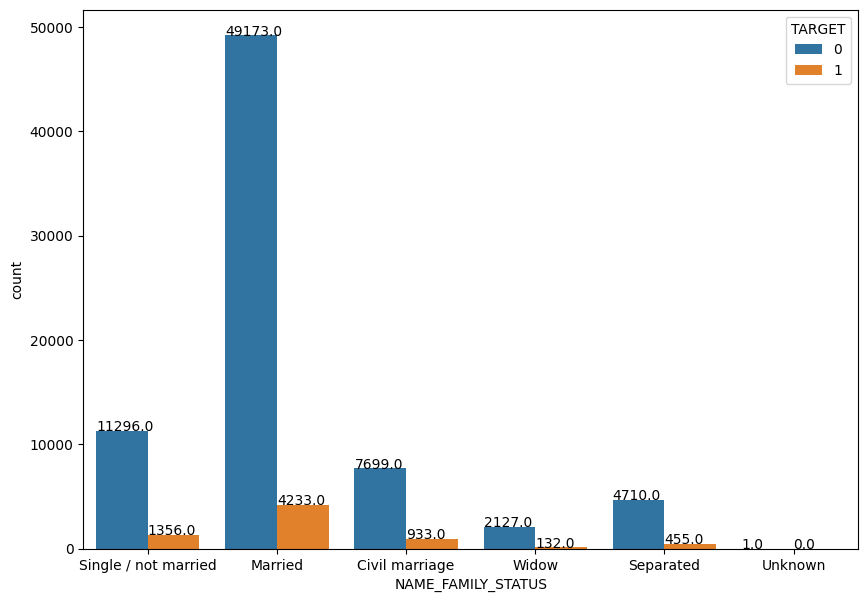

In [36]:
plot_graph(type = "countplot", col = "NAME_FAMILY_STATUS", length = 10, width = 7, title = "Impact of family status on target accomplishment", col2 = df["TARGET"])

* Marital Status vs Target :- 92 % Married people are regular payers while 8 % are defaulter which is highest as per above graph shown.

Education Type - Target

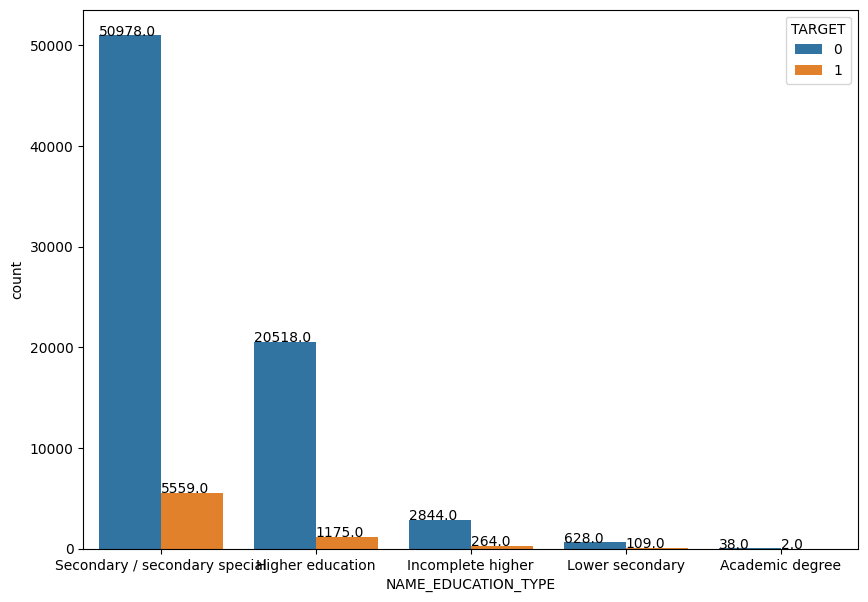

In [37]:
plot_graph(type = "countplot", col = "NAME_EDUCATION_TYPE", length = 10, width = 7, title = "Impact of education type on target accomplishment", col2 = df["TARGET"])

Type of Income - Target

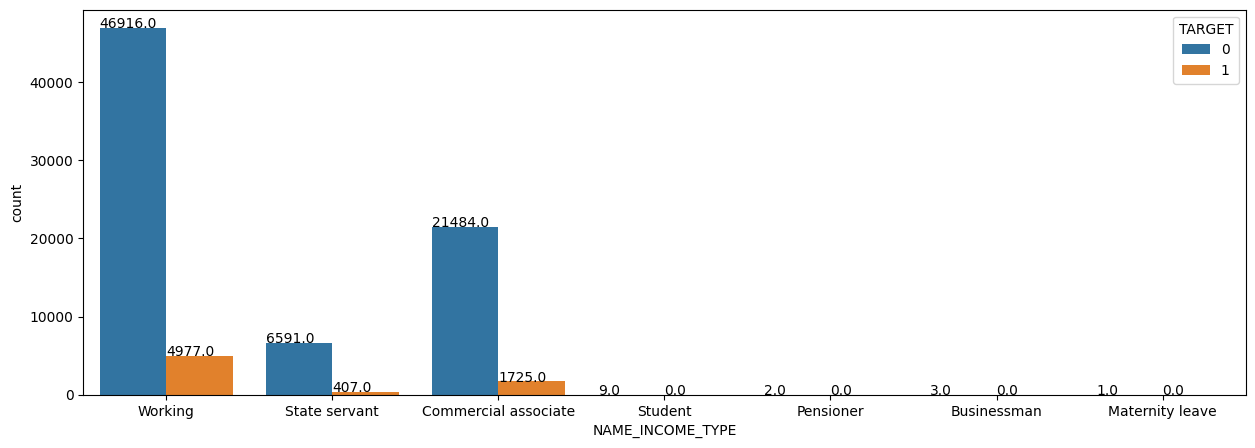

In [38]:
plot_graph(type = "countplot", col = "NAME_INCOME_TYPE", length = 15, width = 5, title = "Impact of income type on target accomplishment", col2 = df["TARGET"])

* Income Type vs Target :- 94 % State servant are paying regularly and 6% are only defulter and hence Income Type State servant are least defaulter among other Income Type. While simultaneously it can also be observed that Students, Pensioner, Busniessmen and those with maternity leave do not default at all.

Accompanying partner - Target

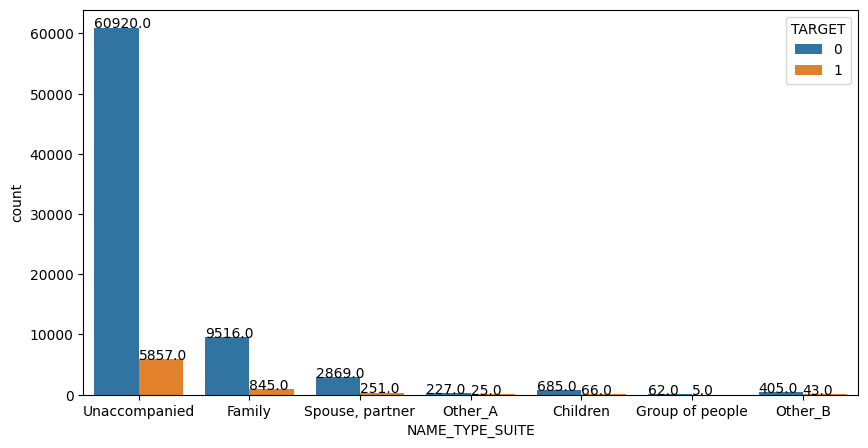

In [39]:
plot_graph(type = "countplot", col = "NAME_TYPE_SUITE", length = 10, width = 5, title = "Type of suite on target accomplishment", col2 = df["TARGET"])

#### In order to assess these multiple possible outcomes, a heatmap will be used to resolve to present all different relationship

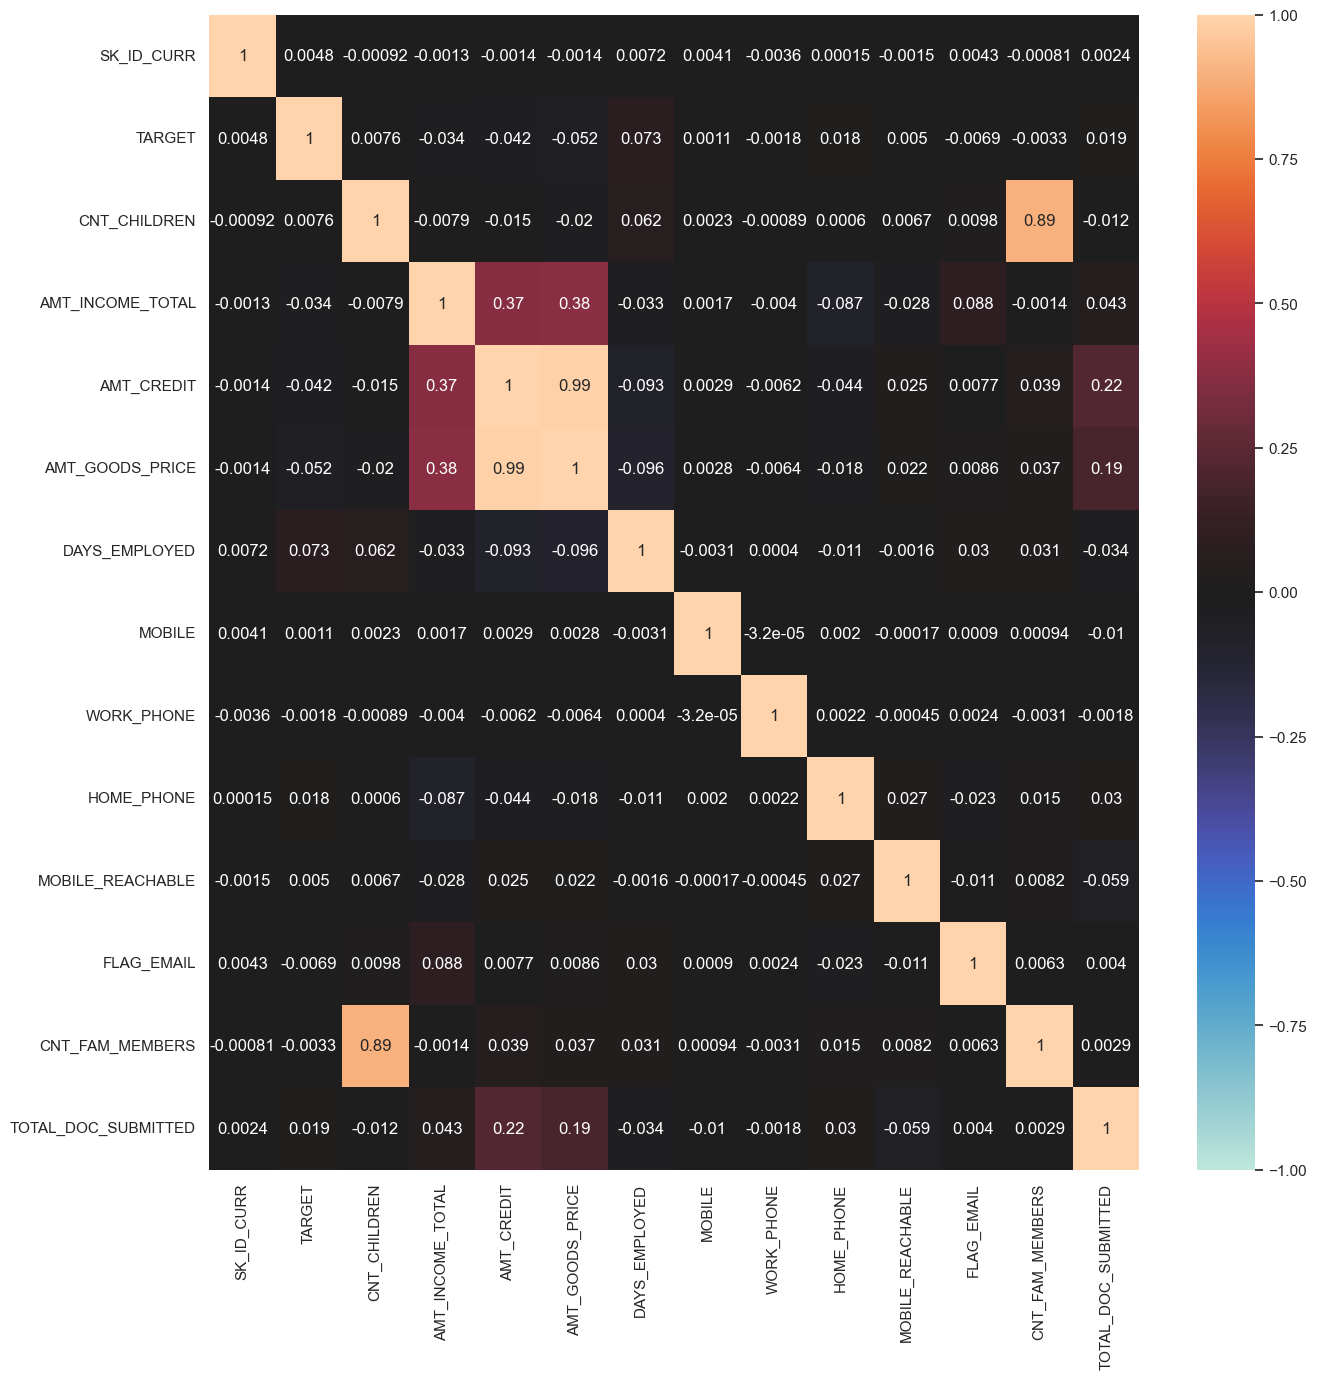

In [40]:
plt.figure(figsize=[15,15])
sns.set(font_scale=1)
sns.heatmap(df.corr(),center=0,annot=True, vmin =-1, vmax = 1)
plt.show()

Thus, one major conclusion that can be made from the above map is that not all the columns have a strong correlation while a stronger correlation can be found between count of family members and count of children which is 0.89 which is purely applicable in the normal scenario as well.

## CONCLUSION

* An individuals count of family members increase the Amount Income Total :- There is no pattern that can be observed from above graphs that shows that the Amount of Total income Increases with respect to Count of Family members hence Hypothesis stands incorrect.
* Male earns more than Females :- As observed, the maximum earning of males are 175000 while females remain at approx 130000. Hence the Hypothesis stands correct.
* Females are more sincere in term of Loan repayment than males :- As shown in the graph, 92% of females are paying on time while males paying on time are 89%, hence the hypothesis is proven correct
* Those who holds Academic Degree earn more :- Academic degree holders are earning more as compare to other degree holder.
* Contract Type Cash Loan are more prone to default as compare to Revolving Loan :- 91% cash Loan contract types are paying on time while 94.3 % Revolving Loan are paying on time. Hence, More defaulters belong to those who take CASH LOANS. 
* Labourers are more in terms of availing loan and also they are more defaulter in repayment :- 89.3% Labourere are paying loan on time and 10.6 % Labourers are defaulter which is highest in both case among the data given and as per the graph.
* Married people have more chances to default on loan repayment :- 92 % Married people are regular payers while 8 % are defaulter which is highest as per the graph shown.
* State Servant default the least :- 94 % State servant are paying regularly and 6% are only defulter and hence Income Type State servant are least defaulter among other Income Type. While simultaneously it can also be observed that Students, Pensioner, Busniessmen and those with maternity leave do not default at all.